# Predicting cervical cancer using machine learning
This notebook integrates and implements various Python-based machine learning and data science libraries to build a machine learning model capable of predicting whether or not someone has cervical cancer based on their medical attributes.

The sequential and iterative method of approach utilised in this project involves the following steps:

Problem definition
Data
Evaluation
Features
Modelling
Experimentation
## 1. Problem Definition
Is the prediction of cervical cancer diagnosis in patients using their clinical history, lifestyle factors, and diagnostic test results feasible?
## 2. Data
The data was obtained from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+(Risk+Factors)

It's also available on Kaggle: https://www.kaggle.com/datasets/ranzeet013/cervical-cancer-dataset/data

The csv file (risk_factors_cervical_cancer.csv) is available in the project folder.
## 3. Evaluation
If at least the model reaches 95% accuracy on the validation set, the project will proceed accordingly.

Notes:
- Missing values are represented by ? in the dataset.
- Binary indicators (0/1) are used for categorical variables where 0 typically represents the absence and 1 represents the presence of the condition or behavior.

## Preparing and importing the neccessary tools

In [50]:
# Importing some required libraries and packages(others will be imported as needed)

# Exploratory Data Analysis and plotting libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensuring all plots are displayed within the notebook
%matplotlib inline

# Tools for handling class imbalance in the dataset
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Importing machine learning models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier  

# Model evaluation tools
from sklearn.model_selection import (
    train_test_split, 
    cross_val_score,
    RandomizedSearchCV, 
    GridSearchCV
)
from sklearn.metrics import (
    confusion_matrix, 
    classification_report,
    precision_score, 
    recall_score, 
    f1_score,
    RocCurveDisplay 
)

# Display versions for debugging
print("Versions:")
print(f"Seaborn version: {sns.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

Versions:
Seaborn version: 0.13.2
NumPy version: 1.26.4
Pandas version: 2.2.3


# Basic data visualization and overview

In [51]:
# Reading the dataset
df = pd.read_csv('risk_factors_cervical_cancer.csv', na_values='?')
# Displaying the first few rows and last few rows of the dataset to understand its structure
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0


## Data Cleaning

In [52]:
# Checking for missing values in two specific columns related to STDs
missing_count = df['STDs: Time since first diagnosis'].isnull().sum()
print(f"Missing values in 'STDs: Time since first diagnosis': {missing_count}")

missing_count = df['STDs: Time since last diagnosis'].isnull().sum()
print(f"Missing values in 'STDs: Time since last diagnosis': {missing_count}")

Missing values in 'STDs: Time since first diagnosis': 787
Missing values in 'STDs: Time since last diagnosis': 787


In [53]:
# Dropping the two columns with too many missing values
df = df.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1)
# Displaying the first few rows and last few rows of the modified DataFrame to confirm changes
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0


In [54]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:He

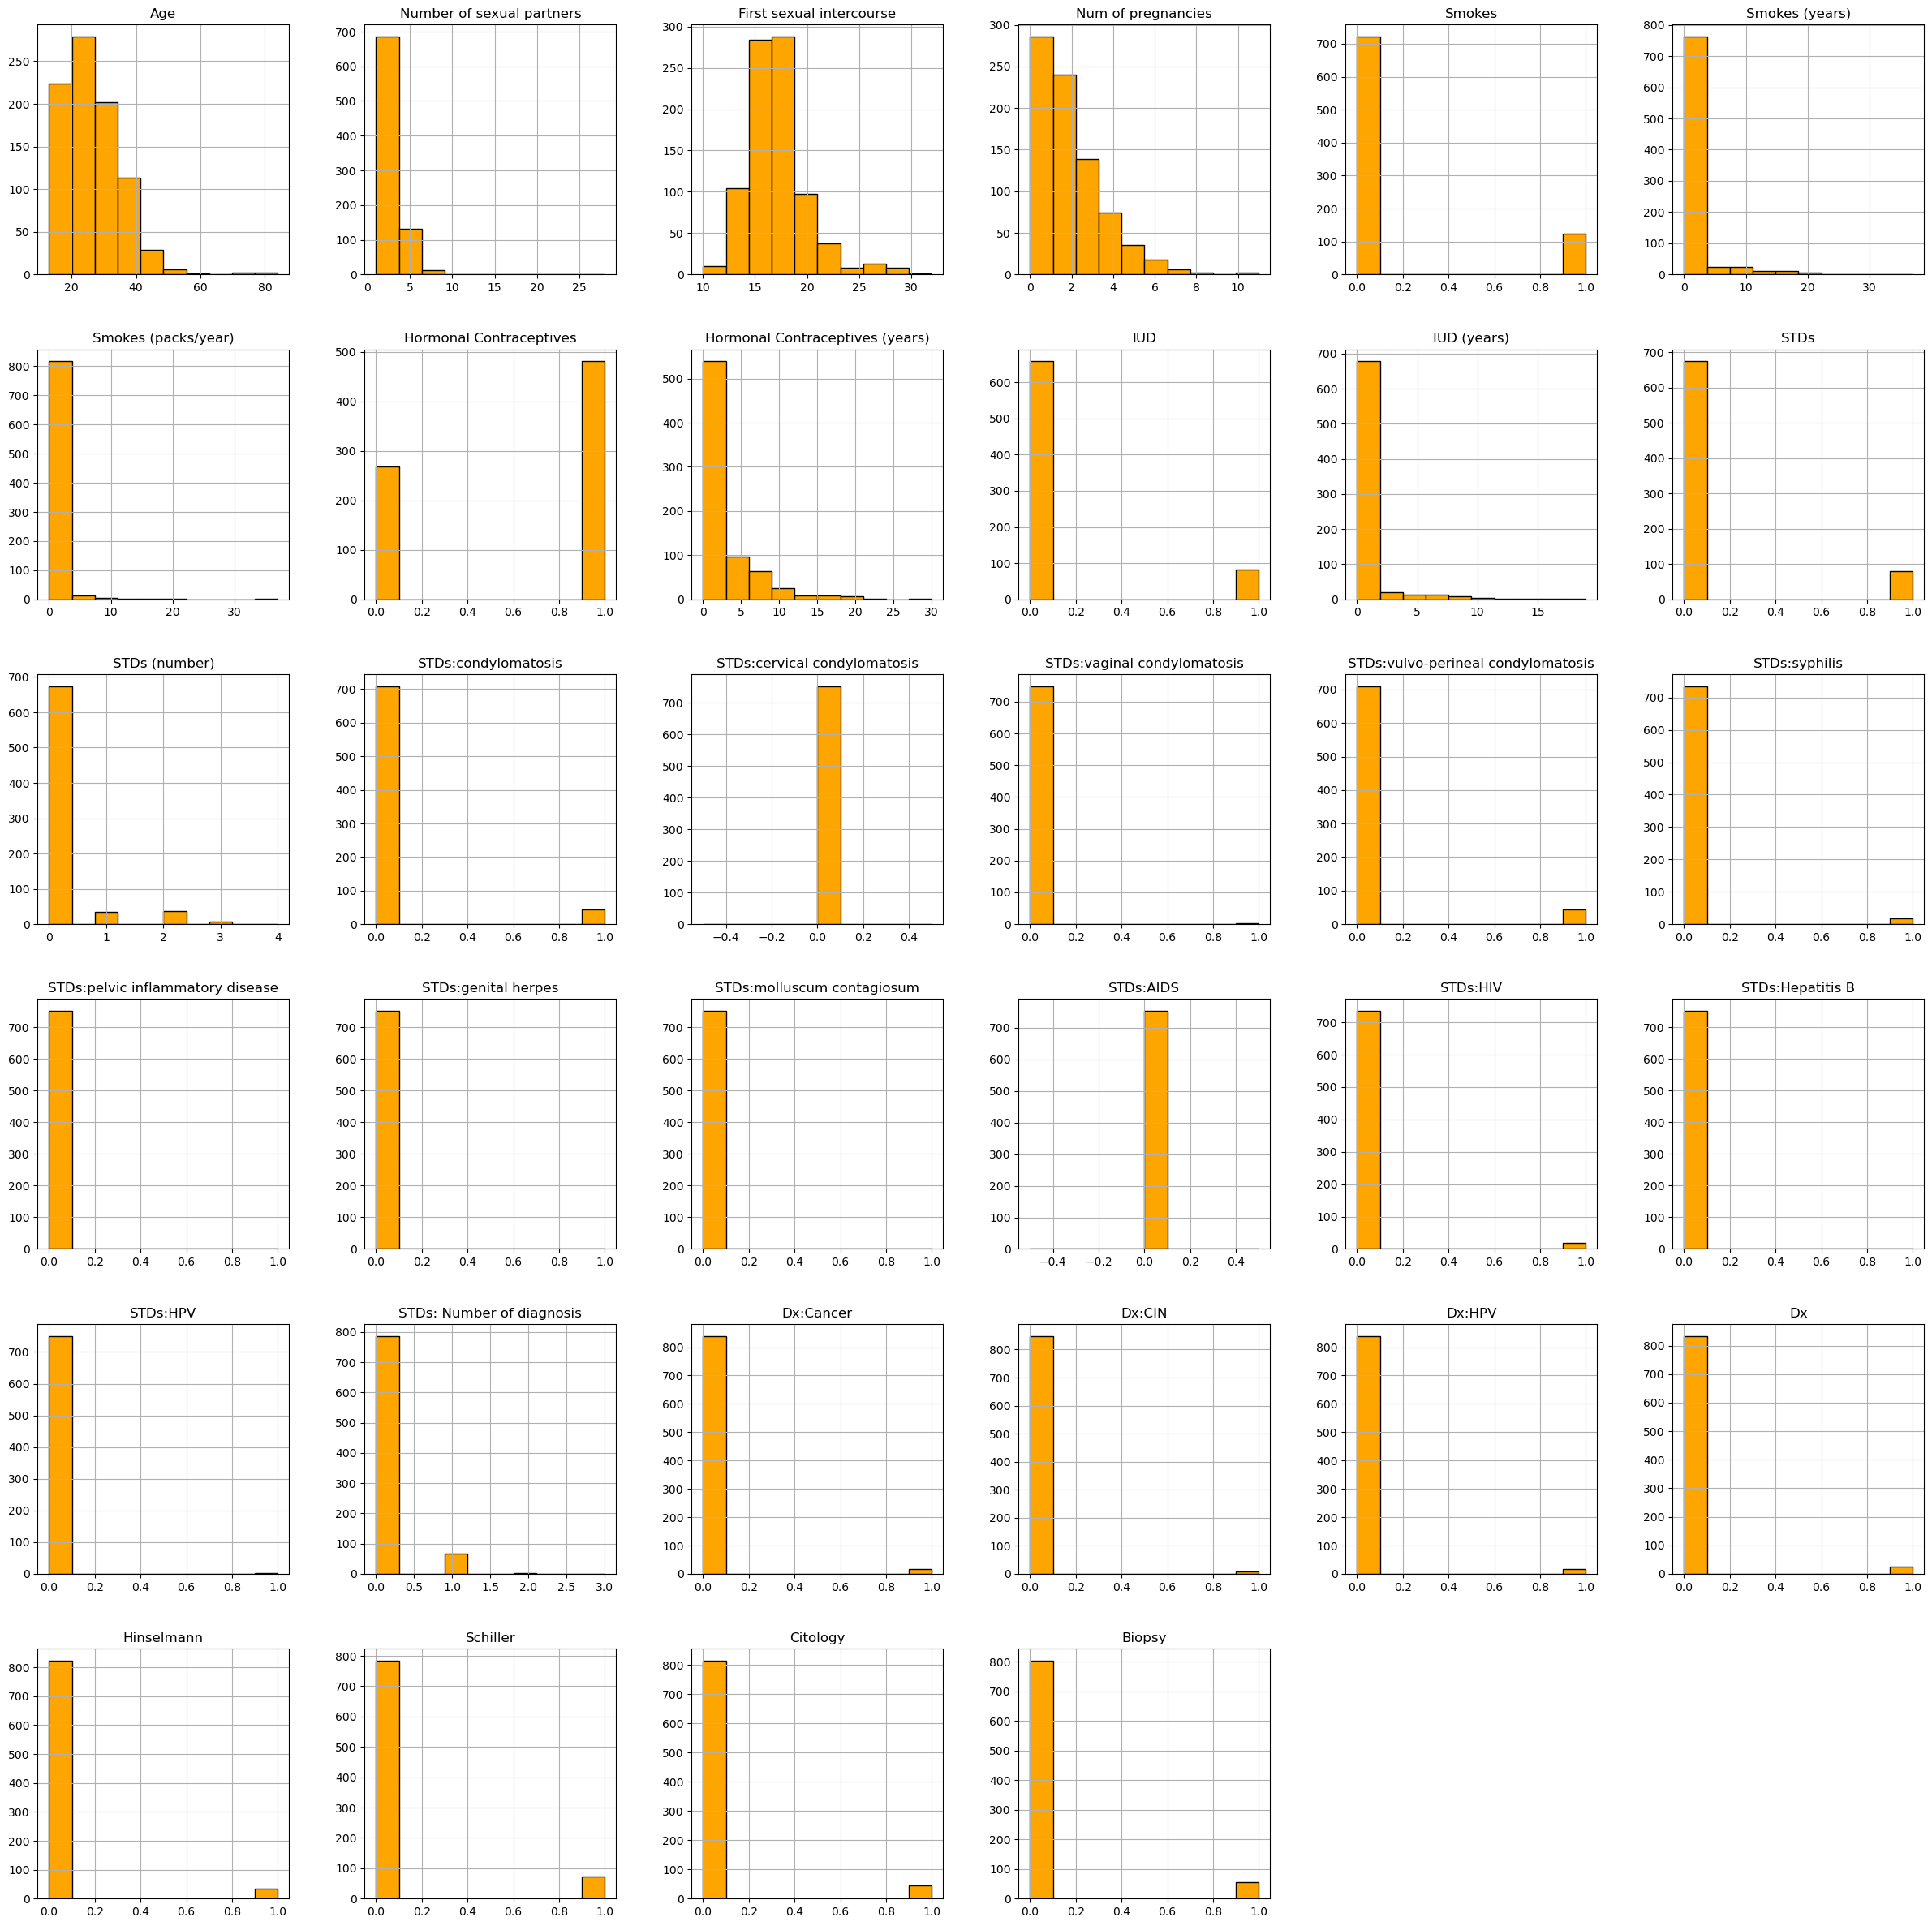

In [55]:
# Display a histogram of the dataframe to identify skewness and outliers
df.hist(bins = 10, figsize = (30,30), color='orange', edgecolor='black')
plt.show()

In [56]:
# Fill missing values with the mean of each column
df = df.fillna(df.mean())

In [57]:
# Check for colummns with only one unique value
unique_counts = df.nunique()
print("Unique values per column:")
print(unique_counts)


Unique values per column:
Age                                   44
Number of sexual partners             13
First sexual intercourse              22
Num of pregnancies                    12
Smokes                                 3
Smokes (years)                        31
Smokes (packs/year)                   63
Hormonal Contraceptives                3
Hormonal Contraceptives (years)       41
IUD                                    3
IUD (years)                           27
STDs                                   3
STDs (number)                          6
STDs:condylomatosis                    3
STDs:cervical condylomatosis           1
STDs:vaginal condylomatosis            3
STDs:vulvo-perineal condylomatosis     3
STDs:syphilis                          3
STDs:pelvic inflammatory disease       3
STDs:genital herpes                    3
STDs:molluscum contagiosum             3
STDs:AIDS                              1
STDs:HIV                               3
STDs:Hepatitis B               

In [58]:
# Dropping two columns with only one unique value
df = df.drop(['STDs:AIDS', 'STDs:condylomatosis'], axis=1)

In [59]:
# Display the shape of the DataFrame
df.shape

(858, 32)

# Exploratory Data Analysis

In [60]:
# View all features in the DataFrame
pd.set_option('display.max_columns', None)
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0


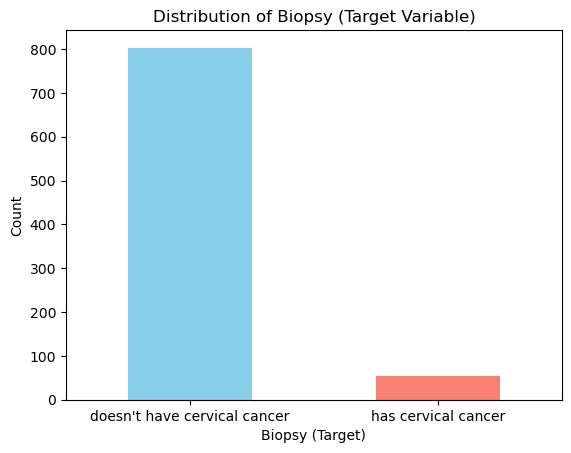

Biopsy
doesn't have cervical cancer    803
has cervical cancer              55
Name: count, dtype: int64


In [61]:
# Display the distribution of the target variable 'Biopsy'
df['Biopsy'].map({0: "doesn't have cervical cancer", 1: "has cervical cancer"}).value_counts().plot(
    kind='bar',
    color=['skyblue', 'salmon']
)
plt.xlabel('Biopsy (Target)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('Distribution of Biopsy (Target Variable)')
plt.show()

# Print value counts with custom labels
print(df['Biopsy'].value_counts().rename({0: "doesn't have cervical cancer", 1: "has cervical cancer"}))

In [62]:
# Display the DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

In [63]:
# Display the descriptive statistics of the DataFrame
df.describe

<bound method NDFrame.describe of      Age  Number of sexual partners  First sexual intercourse  \
0     18                        4.0                   15.0000   
1     15                        1.0                   14.0000   
2     34                        1.0                   16.9953   
3     52                        5.0                   16.0000   
4     46                        3.0                   21.0000   
..   ...                        ...                       ...   
853   34                        3.0                   18.0000   
854   32                        2.0                   19.0000   
855   25                        2.0                   17.0000   
856   33                        2.0                   24.0000   
857   29                        2.0                   20.0000   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                   1.0     0.0             0.0                  0.0   
1                   1.0     0.0          

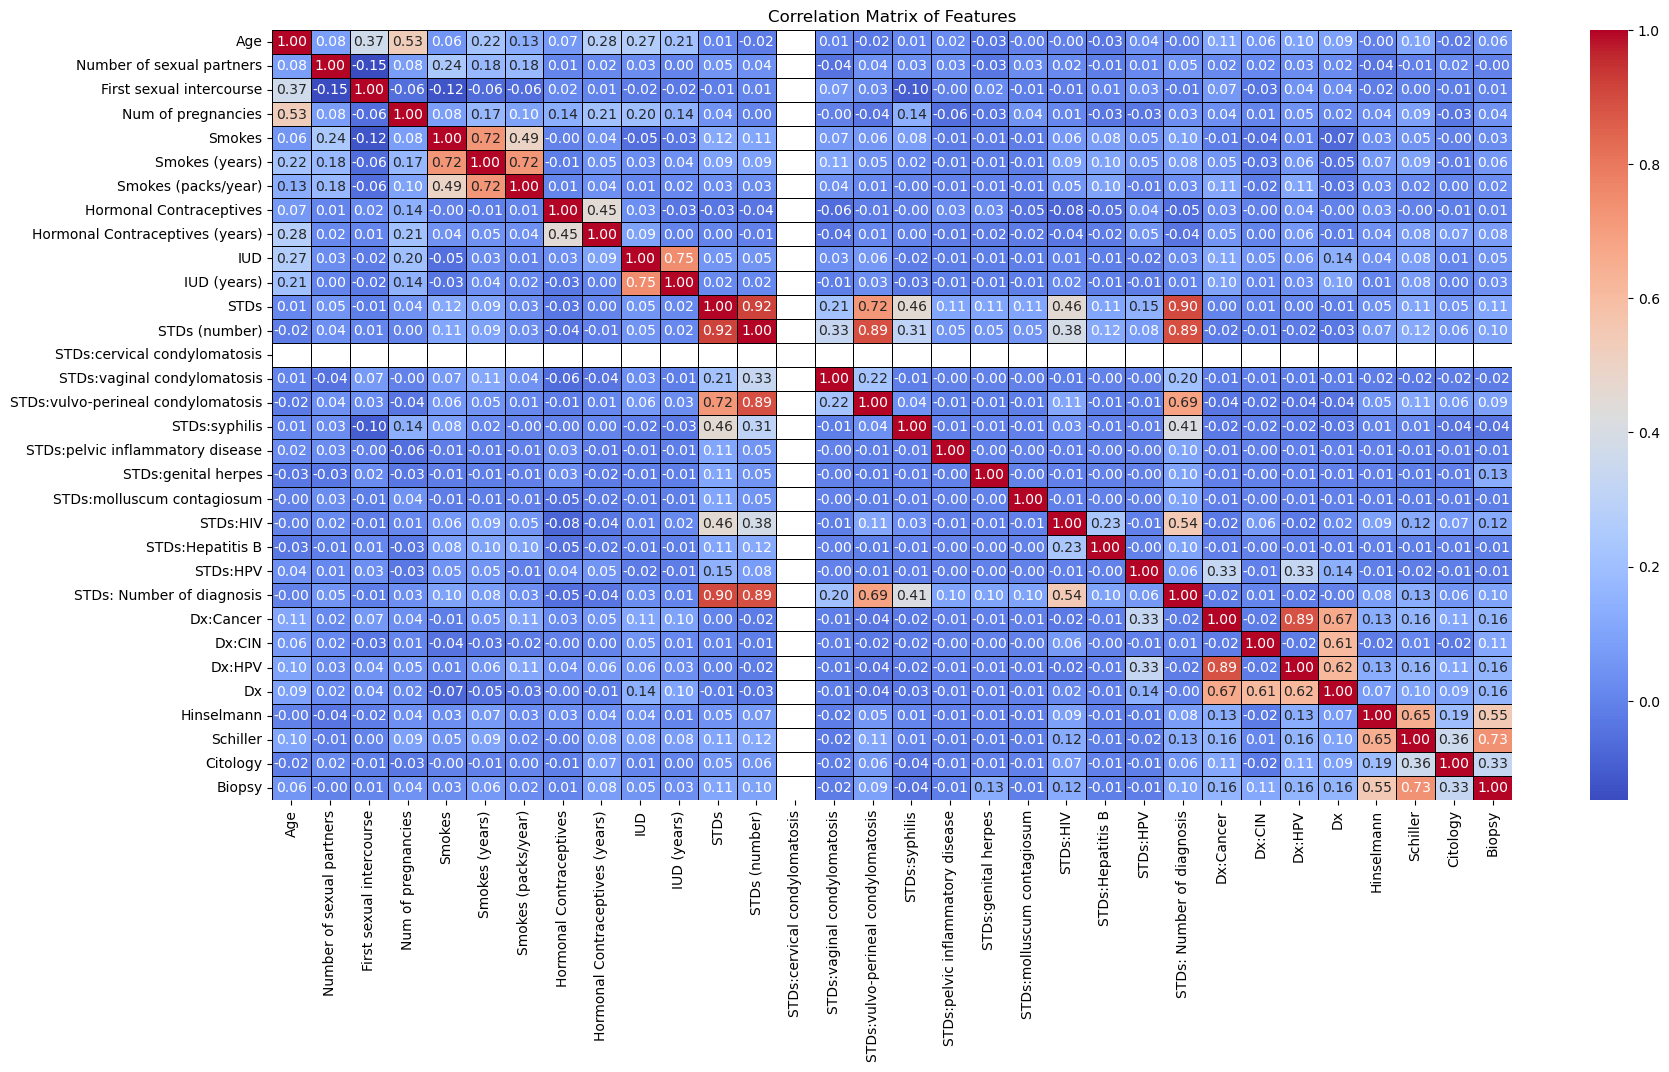

In [64]:
# Make a correlation matrix to visualize the relationships between features
fig, ax = plt.subplots(figsize=(20, 10))
correlation_matrix = df.corr()
ax = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm',  
    linewidths=0.5, 
    linecolor='black' 

)
plt.title('Correlation Matrix of Features')
plt.show()

In [65]:
df.corr()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.084896,0.369168,0.526137,0.055813,0.217349,0.131180,0.065624,0.277181,0.267662,0.205886,0.010017,-0.015488,NaN,0.006220,-0.022614,0.010442,0.023216,-0.029076,-0.000919,-0.002025,-0.029076,0.038546,-0.001606,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
Number of sexual partners,0.084896,1.000000,-0.147937,0.076719,0.238078,0.177117,0.175153,0.006342,0.018552,0.030005,0.004215,0.053754,0.039359,NaN,-0.042924,0.036750,0.027178,0.030616,-0.031826,0.030616,0.019871,-0.011012,0.013871,0.051559,0.022309,0.015691,0.027264,0.022982,-0.039273,-0.008899,0.021839,-0.001429
First sexual intercourse,0.369168,-0.147937,1.000000,-0.058223,-0.123602,-0.058366,-0.056332,0.018344,0.008000,-0.020975,-0.024803,-0.013133,0.006487,NaN,0.071425,0.031082,-0.100999,-0.001089,0.023398,-0.013332,-0.013430,0.011154,0.033112,-0.013327,0.067283,-0.032626,0.043966,0.035750,-0.016546,0.003493,-0.010971,0.007262
Num of pregnancies,0.526137,0.076719,-0.058223,1.000000,0.080768,0.174912,0.097044,0.142858,0.207839,0.198550,0.143642,0.044250,0.001706,NaN,-0.003166,-0.037204,0.141728,-0.056542,-0.032114,0.041168,0.009384,-0.032114,-0.028162,0.033514,0.035123,0.007344,0.046753,0.019025,0.038685,0.087687,-0.029656,0.043460
Smokes,0.055813,0.238078,-0.123602,0.080768,1.000000,0.723128,0.493361,-0.002165,0.044157,-0.051184,-0.032996,0.116676,0.105811,NaN,0.069631,0.062775,0.082684,-0.014059,-0.014059,-0.014059,0.059412,0.083551,0.049171,0.095433,-0.011027,-0.042822,0.012210,-0.067614,0.034527,0.053613,-0.003913,0.029091
Smokes (years),0.217349,0.177117,-0.058366,0.174912,0.723128,1.000000,0.724116,-0.011002,0.048899,0.027562,0.037900,0.091611,0.091313,NaN,0.114332,0.047511,0.015393,-0.010337,-0.010337,-0.010337,0.090636,0.099170,0.050935,0.081676,0.054674,-0.030966,0.057214,-0.048894,0.071232,0.094640,-0.006750,0.061484
Smokes (packs/year),0.131180,0.175153,-0.056332,0.097044,0.493361,0.724116,1.000000,0.005880,0.040112,0.007891,0.015912,0.029372,0.030780,NaN,0.041412,0.009130,-0.003277,-0.007180,-0.007180,-0.007180,0.054577,0.101105,-0.008410,0.032186,0.108476,-0.021127,0.110366,-0.033358,0.026662,0.017954,0.004613,0.024657
Hormonal Contraceptives,0.065624,0.006342,0.018344,0.142858,-0.002165,-0.011002,0.005880,1.000000,0.448574,0.033729,-0.033752,-0.032105,-0.038088,NaN,-0.059222,-0.013714,-0.003624,0.027587,0.027587,-0.048598,-0.076278,-0.048598,0.039040,-0.050660,0.026407,-0.003334,0.038038,-0.001723,0.033551,-0.004247,-0.011030,0.007711
Hormonal Contraceptives (years),0.277181,0.018552,0.008000,0.207839,0.044157,0.048899,0.040112,0.448574,1.000000,0.094953,0.000455,0.000829,-0.006468,NaN,-0.038207,0.009685,0.003897,-0.014209,-0.019065,-0.021494,-0.035472,-0.021494,0.052059,-0.037219,0.054627,0.003086,0.061394,-0.012865,0.038825,0.078707,0.074324,0.078995
IUD,0.267662,0.030005,-0.020975,0.198550,-0.051184,0.027562,0.007891,0.033729,0.094953,1.000000,0.746478,0.053859,0.053146,NaN,0.032093,0.061867,-0.022311,-0.013125,-0.013125,-0.013125,0.008590,-0.013125,-0.018574,0.029871,0.110541,0.051833,0.058154,0.138905,0.044059,0.084074,0.007348,0.051554


In [66]:
# Display the values of STDs:cervical condylomatosis
print(df['STDs:cervical condylomatosis'].value_counts())


STDs:cervical condylomatosis
0.0    858
Name: count, dtype: int64


In [67]:
# Remove the 'STDs:cervical condylomatosis' column because it only has one unique value
df = df.drop(['STDs:cervical condylomatosis'], axis=1
)

In [68]:
X = df.drop('Biopsy', axis=1)  # Features
y = df['Biopsy']  # Target variable

In [69]:
x = np.array(X).astype('float32')
y = np.array(y).astype('float32')

# Scaling

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)


# Splitting the Dataset into training, testing and validation set

In [71]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.2,
                                                    random_state=75)

x_test, x_val, y_test, y_val = train_test_split(x_test, 
                                                y_test, 
                                                test_size = 0.5,
                                                random_state=75)

In [72]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((686, 30), (86, 30), (686,), (86,))

In [73]:
x_test.shape, x_val.shape, y_test.shape, y_val.shape


((86, 30), (86, 30), (86,), (86,))

# Model Evaluation and Selection


Evaluation for Logistic Regression

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        81
         1.0       0.60      0.60      0.60         5

    accuracy                           0.95        86
   macro avg       0.79      0.79      0.79        86
weighted avg       0.95      0.95      0.95        86



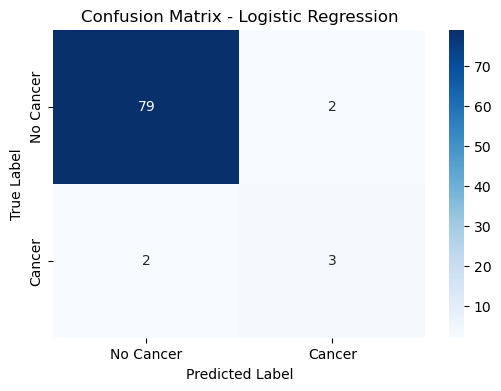


AUC Score: 0.8098765432098767


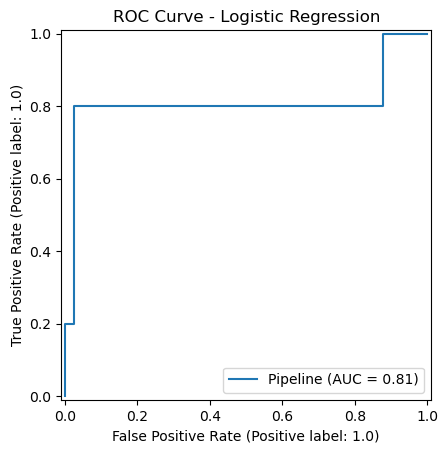


Cross-Validation AUC Scores: [0.87109375 0.90972222 0.85677083 0.97743056 0.98503937]
Mean CV AUC Score: 0.9200113462379701

Evaluation for KNN

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97        81
         1.0       0.57      0.80      0.67         5

    accuracy                           0.95        86
   macro avg       0.78      0.88      0.82        86
weighted avg       0.96      0.95      0.96        86



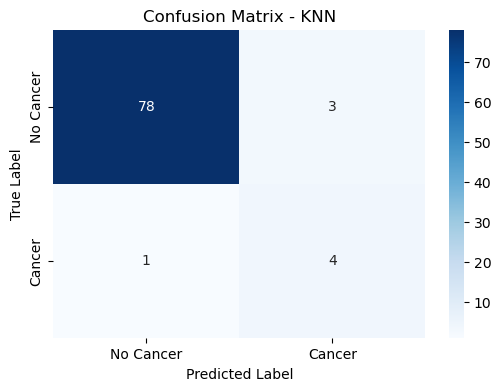


AUC Score: 0.9728395061728395


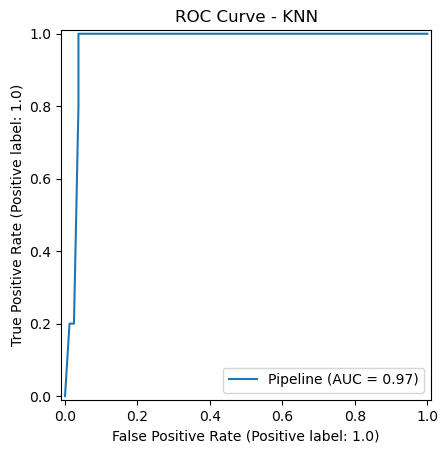


Cross-Validation AUC Scores: [0.81289062 0.92361111 0.72786458 0.92621528 0.93110236]
Mean CV AUC Score: 0.8643367918853893

Evaluation for Random Forest

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98        81
         1.0       0.67      0.40      0.50         5

    accuracy                           0.95        86
   macro avg       0.82      0.69      0.74        86
weighted avg       0.95      0.95      0.95        86



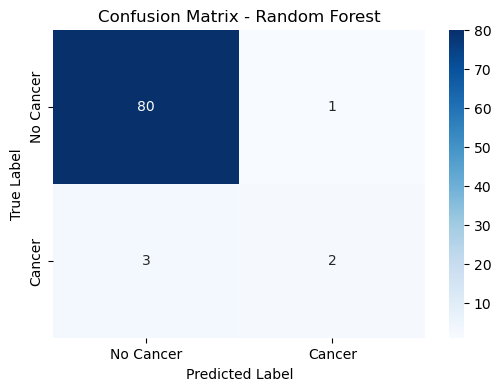


AUC Score: 0.9827160493827161


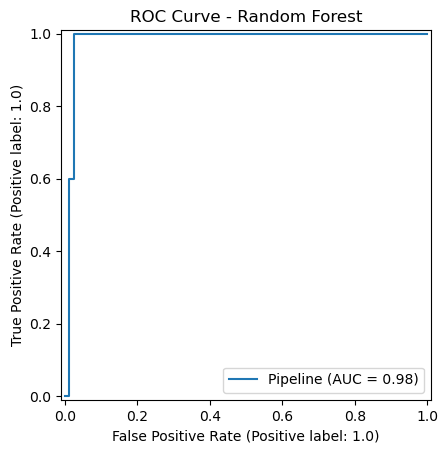


Cross-Validation AUC Scores: [0.89648438 0.96657986 0.88845486 0.99305556 0.98897638]
Mean CV AUC Score: 0.9467102061461066

Evaluation for XGBoost

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96        81
         1.0       0.33      0.20      0.25         5

    accuracy                           0.93        86
   macro avg       0.64      0.59      0.61        86
weighted avg       0.92      0.93      0.92        86



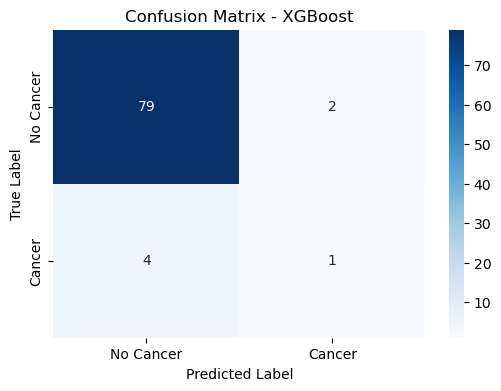


AUC Score: 0.980246913580247


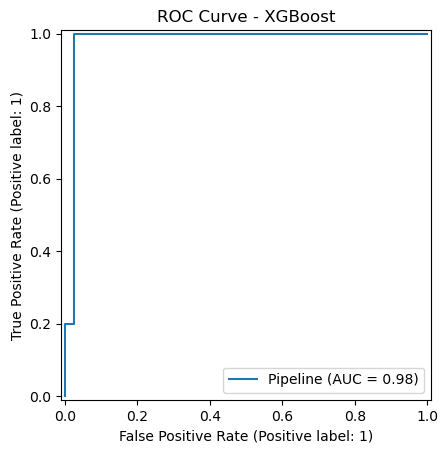


Cross-Validation AUC Scores: [0.81171875 0.92795139 0.87152778 0.98090278 0.98897638]
Mean CV AUC Score: 0.9162154144794401


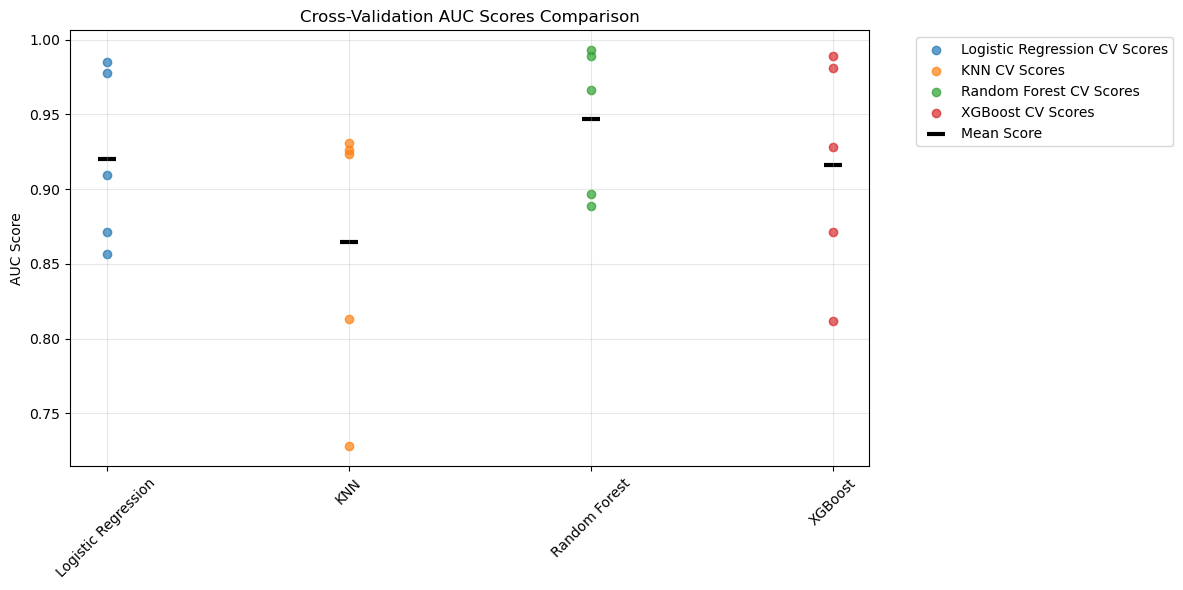


Summary of Model Performance:
            model_name  mean_cv_auc  auc_score
2        Random Forest     0.946710   0.982716
0  Logistic Regression     0.920011   0.809877
3              XGBoost     0.916215   0.980247
1                  KNN     0.864337   0.972840


In [74]:
from xgboost import XGBClassifier
from sklearn.metrics import (roc_auc_score)
    

def evaluate_model(model, model_name, x_train, y_train, x_test, y_test):
    # Train model
    model.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)
    y_probs = model.predict_proba(x_test)[:, 1]
    
    # Classification report
    print(f"\n{'='*50}")
    print(f"Evaluation for {model_name}")
    print(f"{'='*50}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix plot
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Cancer', 'Cancer'],
                yticklabels=['No Cancer', 'Cancer'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # ROC curve and AUC score
    print("\nAUC Score:", roc_auc_score(y_test, y_probs))
    RocCurveDisplay.from_estimator(model, x_test, y_test)
    plt.title(f'ROC Curve - {model_name}')
    plt.show()
    
    # Cross-validation
    cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='roc_auc')
    print("\nCross-Validation AUC Scores:", cv_scores)
    print("Mean CV AUC Score:", cv_scores.mean())
    
    return {
        'model_name': model_name,
        'mean_cv_auc': cv_scores.mean(),
        'auc_score': roc_auc_score(y_test, y_probs),
        'cv_scores': cv_scores
    }

# Initialize models
models = {
    "Logistic Regression": Pipeline([
        ('smote', SMOTE(random_state=75)),  
        ('model', LogisticRegression(max_iter=1000, random_state=75))  
    ]),
    "KNN": Pipeline([
        ('smote', SMOTE(random_state=75)),
        ('model', KNeighborsClassifier())
    ]),
    "Random Forest": Pipeline([
        ('smote', SMOTE(random_state=75)),
        ('model', RandomForestClassifier(random_state=75))
    ]),
    "XGBoost": Pipeline([
        ('smote', SMOTE(random_state=75)),
        ('model', XGBClassifier(random_state=75, eval_metric='logloss'))
    ])
}

# Store evaluation results
results = []

# Evaluate each model
for name, model in models.items():
    model_results = evaluate_model(model, name, x_train, y_train, x_test, y_test)
    results.append(model_results)

# Create comparison plot of cross-validation metrics
plt.figure(figsize=(12, 6))

# Plot individual CV scores
for i, res in enumerate(results):
    plt.scatter([res['model_name']]*5, res['cv_scores'], 
                label=f'{res["model_name"]} CV Scores', alpha=0.7)

# Plot mean scores
mean_scores = [res['mean_cv_auc'] for res in results]
model_names = [res['model_name'] for res in results]
plt.scatter(model_names, mean_scores, color='black', s=150, 
            marker='_', linewidth=3, label='Mean Score')

plt.title('Cross-Validation AUC Scores Comparison')
plt.ylabel('AUC Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create summary table
results_df = pd.DataFrame(results)[['model_name', 'mean_cv_auc', 'auc_score']]
print("\nSummary of Model Performance:")
print(results_df.sort_values('mean_cv_auc', ascending=False))

In [75]:
# Create a pipeline with SMOTE + RandomForest
model = Pipeline([
    ('smote', SMOTE(random_state=75)), 
    ('model', RandomForestClassifier(n_estimators=100, random_state=75))  
])

# Train the model (SMOTE is applied automatically during fit)
model.fit(x_train, y_train)

# Evaluate
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
val_score = model.score(x_val, y_val)

print(f"Training accuracy: {train_score:.4f}")
print(f"Test accuracy: {test_score:.4f}")
print(f"Validation accuracy: {val_score:.4f}")


Training accuracy: 1.0000
Test accuracy: 0.9535
Validation accuracy: 0.9651


# Hyperparameter tuning using GridSearchCV

In [76]:
# Define the parameter grid
param_grid = {
    'model__n_estimators': [50, 100, 200],      
    'model__max_depth': [None, 10, 20],         
    'model__min_samples_split': [2, 5],         
    'model__min_samples_leaf': [1, 2]           
}

# Initialize the model
model = Pipeline([
    ('smote', SMOTE(random_state=75)), 
    ('model', RandomForestClassifier(n_estimators=100, random_state=75))  
])

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # Use all available cores
)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best model
GSCV_model = grid_search.best_estimator_

# Evaluate the best model
train_score = GSCV_model.score(x_train, y_train)
test_score = GSCV_model.score(x_test, y_test)
val_score = GSCV_model.score(x_val, y_val)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Training accuracy: {train_score:.4f}")
print(f"Test accuracy: {test_score:.4f}")
print(f"Validation accuracy: {val_score:.4f}")



Best parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 50}
Training accuracy: 0.9956
Test accuracy: 0.9535
Validation accuracy: 0.9535


# Model deployment
 The original RandomForest + SMOTE model is used because it has a higher score than the GridSearchCV model

Model saved as 'cervical_cancer_model.pkl'
Predictions on the test set: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Number of correct predictions: 82 out of 86


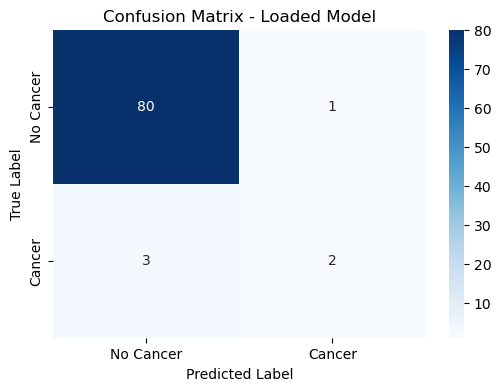

In [77]:
import joblib

# Create a pipeline with SMOTE + RandomForest
model = Pipeline([
    ('smote', SMOTE(random_state=75)), 
    ('model', RandomForestClassifier(n_estimators=100, random_state=75))  
])

# Train the model (SMOTE is applied automatically during fit)
model.fit(x_train, y_train)

# Save the original model
joblib.dump(model, 'cervical_cancer_model.pkl')
 
print("Model saved as 'cervical_cancer_model.pkl'")
# Load the model for future use
loaded_model = joblib.load('cervical_cancer_model.pkl')
import json

# When saving the file (do this first to recreate the file)
with open("feature_columns.json", "w", encoding='utf-8') as f:
    json.dump(list(X.columns), f, ensure_ascii=False)
 
 
# Make predictions with the loaded model
predictions = loaded_model.predict(x_test)
# Display the predictions
print("Predictions on the test set:", predictions)
# Check the number of predictions that are correct
correct_predictions = (predictions == y_test).sum()
print(f"Number of correct predictions: {correct_predictions} out of {len(y_test)}")
# Plot confusion matrix for the loaded model
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Cancer', 'Cancer'],
                yticklabels=['No Cancer', 'Cancer'])
plt.title('Confusion Matrix - Loaded Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# Feature Importance Analysis

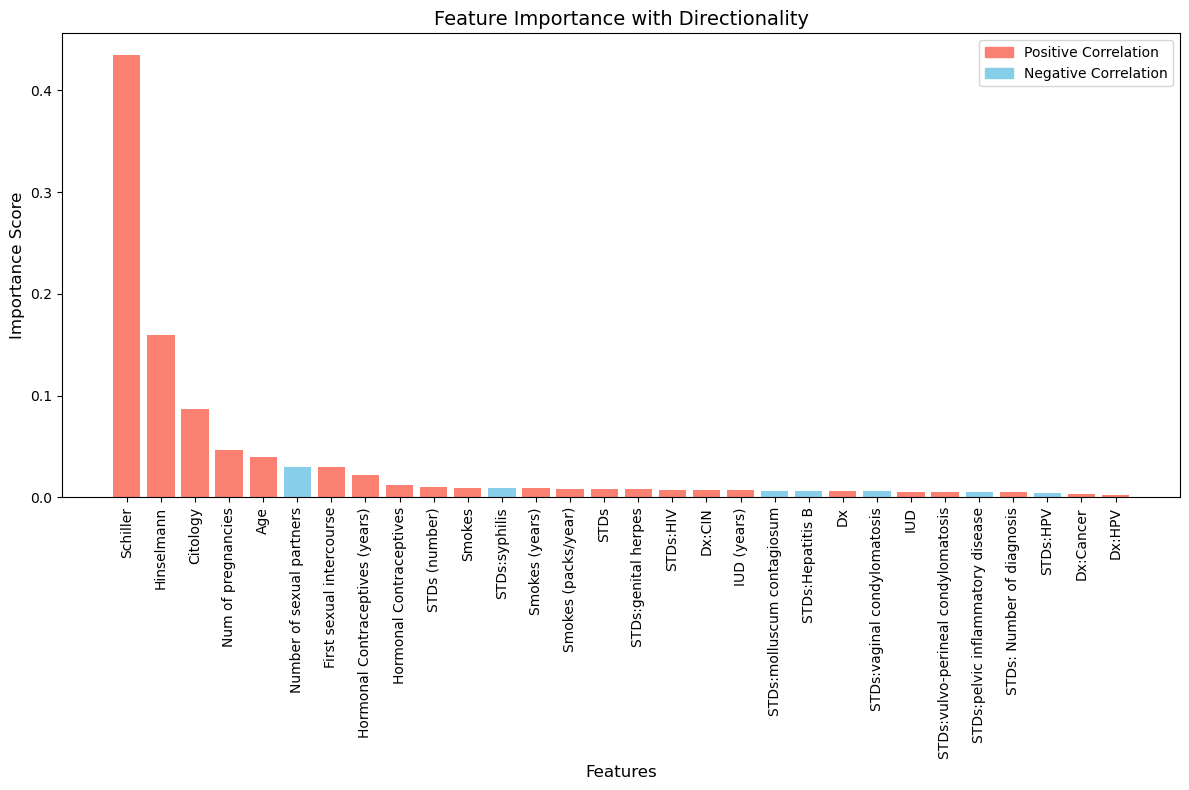


Top Features with Direction:
1. Schiller: 0.4343 (+)
2. Hinselmann: 0.1599 (+)
3. Citology: 0.0864 (+)
4. Num of pregnancies: 0.0464 (+)
5. Age: 0.0394 (+)
6. Number of sexual partners: 0.0300 (-)
7. First sexual intercourse: 0.0300 (+)
8. Hormonal Contraceptives (years): 0.0220 (+)
9. Hormonal Contraceptives: 0.0121 (+)
10. STDs (number): 0.0104 (+)


In [78]:
# Calculate feature correlations with target
correlations = df.drop('Biopsy', axis=1).corrwith(df['Biopsy']).values

# Get the RandomForest model from the pipeline
rf_model = model.named_steps['model']
importances = rf_model.feature_importances_
feature_names = df.drop('Biopsy', axis=1).columns

# Sort everything together
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_features = feature_names[indices]
sorted_correlations = correlations[indices]

# Create color mapping (red for positive, blue for negative correlation)
colors = ['salmon' if corr > 0 else 'skyblue' for corr in sorted_correlations]

# Plot with directional coloring
plt.figure(figsize=(12, 8))
bars = plt.bar(range(len(importances)), sorted_importances, 
              align='center', color=colors)
plt.title("Feature Importance with Directionality", fontsize=14)
plt.xticks(range(len(importances)), sorted_features, rotation=90)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance Score', fontsize=12)

# Add legend
import matplotlib.patches as mpatches
pos_patch = mpatches.Patch(color='salmon', label='Positive Correlation')
neg_patch = mpatches.Patch(color='skyblue', label='Negative Correlation')
plt.legend(handles=[pos_patch, neg_patch])

plt.tight_layout()
plt.show()

# Print top features with direction
print("\nTop Features with Direction:")
for i in range(10):
    direction = "+" if sorted_correlations[i] > 0 else "-"
    print(f"{i+1}. {sorted_features[i]}: {sorted_importances[i]:.4f} ({direction})")